# Exploratory Data Analysis - Pedestrian Crash Data

**Exploratory Data Analysis** or most commonly known as EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics. (**Source:** [https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15))

Using the processed dataset from our previous exercise, we will conduct an EDA for all of our attributes to discover relationships among them and discover any trends/insights.

The dataset is composed of the following attributes:

| Attribute | Description | Attribute Group |
| :-: | :-: | :-: |
| YEAR | Year of crash | T |
| MONTH | Month of crash | T |
| DAY | Day (number) of crash | T |
| HOUR | Hour of crash | T |
| VISIBILITY | Atmospheric conditions allowing for road users to look ahead as observed on the crash | E |
| LIGHT | Lighting condition | E |
| RDSFCOND | Road surface conditions at the time of the crash | E |
| TEMP | Temperature (in Celsius) at the time (hour) of the crash | E |
| REL_HUMID | Relative humidity (in %) at the time (hour) of the crash | E |
| DEW_POINT | Dew point temperature (in Celsius) at the time (hour) of the crash | E |
| LOCCOORD | Location of the crash | TRC |
| TRAFFCTL | Traffic control (if any) at the crash location | TRC |
| ROADCLASS | City of Toronto Road Classification of the crash location | TRC |
| SPEEDLMT | Speed limit based on the road classification at the crash location | TRC |
| PED_ADT | Average pedestrian trafffic flow near or at the crash location | TRC |
| LAND_USE | Land use designation at the crash location | BE |
| POP_2021 | Population (Census, 2021) within the dissemination area | D |
| PRIV_DWELL | Number of private dwelling within the dissemination area | D |
| LAND_AREA | Land area of the DA in square kilometers (sq. km.) | D |
| POP_DENS | Population density within the dissemination area | D |
| PDENS_AREA | Population density per land area | D |
| INVAGE | Pedestrian age involved in the crash | PC |
| PEDCOND | Pedestrian condition before the crash | PC |
| MANOEUVER | Vehicle maneouver that lead to the incident/crash | CI |
| PEDACT | Pedestrian action(s) that caused the crash | CI |
| VEHINV | Type of vehicle involved in the crash | CI |
| VIOL | Violation type (if any) that lead to the crash | CI |
| INJURY | Pedestrian injury severity | **TARGET VARIABLE** |

**Attribute Groups:** Temporal (**T**), Environmental (**E**), Traffic and Road Characteristics (**TRC**), Built Environment (**BE**), Demographics (**D**), Pedestrian Characteristics (**PC**), Crash Information (**CI**), **TARGET VARIABLE**

We will begin by installing some of the packages necessary for our analysis.

# 1. Importing Necessary Packages

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import LabelEncoder
# Setting data frame to display maximum rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Ignore all warnings
warnings.filterwarnings('ignore')
# Automatically plot graphs without using plt.show()
%matplotlib inline
# Presetting some matplotlib settings
plt.rcParams.update({
    'text.usetex' : True,
    'font.family' : 'serif',
    'font.serif' : ['Computer Modern']
})

# 2. Importing the Processed Dataset

In [2]:
df = gpd.read_file(r"E:\Term Project 619.26\2_FINAL DATA FOR ML\processed_data_final.shp")
df.head(2)

,INDEX_,DATETIME,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,DEW_POINT,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,PED_ADT,LAND_USE,DAUID,POP_2021,PRIV_DWELL,LAND_AREA,POP_DENS,PDENS_AREA,INVAGE,PEDCOND,MANOEUVER,PEDACT,VEHINV,VIOL,INJURY,LATITUDE,LONGITUDE,geometry
0,3366652,2006-01-02 07:05:00,2006,1,2,7,weekday,Other,Dark,Wet,1.5,0.99,1.3,Midblock,No Control,Major Arterial,50,219.0,Mixed Use,35201436,504,263,225,0.08,6537.0,45 to 64,Distracted,Unknown,Crossing without ROW,automobile,speeding,Major,43.652892,-79.406253,POINT (-8839463.650 5411882.612)
1,3370334,2006-01-04 19:40:00,2006,1,4,19,weekday,Rain,Dark,Wet,4.8,1.00,4.8,Midblock,Traffic Signal including Transit,Major Arterial,50,63.0,Residential,35200944,452,205,183,0.15,3005.3,Over 65,Normal,Unknown,Crossing without ROW,automobile,speeding,Major,43.655145,-79.433590,POINT (-8842506.791 5412229.253)


Let's drop the `DATETIME`, `DAUID`, `LATITUDE`, `LONGITUDE` and `geometry` attributes because they won't be used for any of analysis planned for this exercise.

In [3]:
df = df.drop(['DATETIME', 'DAUID', 'LATITUDE', 'LONGITUDE', 'geometry'], axis=1)
df.head(2)

,INDEX_,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,DEW_POINT,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,PED_ADT,LAND_USE,POP_2021,PRIV_DWELL,LAND_AREA,POP_DENS,PDENS_AREA,INVAGE,PEDCOND,MANOEUVER,PEDACT,VEHINV,VIOL,INJURY
0,3366652,2006,1,2,7,weekday,Other,Dark,Wet,1.5,0.99,1.3,Midblock,No Control,Major Arterial,50,219.0,Mixed Use,504,263,225,0.08,6537.0,45 to 64,Distracted,Unknown,Crossing without ROW,automobile,speeding,Major
1,3370334,2006,1,4,19,weekday,Rain,Dark,Wet,4.8,1.00,4.8,Midblock,Traffic Signal including Transit,Major Arterial,50,63.0,Residential,452,205,183,0.15,3005.3,Over 65,Normal,Unknown,Crossing without ROW,automobile,speeding,Major


Now, let's convert some of the current attributes that are **object** datatype to **category** datatype. The code will be as follows:

In [4]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype('category')
print('Conversion Complete!')

Conversion Complete!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   INDEX_      3113 non-null   int64   
 1   YEAR        3113 non-null   int64   
 2   MONTH       3113 non-null   int64   
 3   DAY         3113 non-null   int64   
 4   HOUR        3113 non-null   int64   
 5   DAYOFWEEK   3113 non-null   category
 6   VISIBILITY  3113 non-null   category
 7   LIGHT       3113 non-null   category
 8   RDSFCOND    3113 non-null   category
 9   TEMP        3113 non-null   float64 
 10  REL_HUMID   3113 non-null   float64 
 11  DEW_POINT   3113 non-null   float64 
 12  LOCCOORD    3113 non-null   category
 13  TRAFFCTL    3113 non-null   category
 14  ROADCLASS   3113 non-null   category
 15  SPEEDLMT    3113 non-null   int64   
 16  PED_ADT     3113 non-null   float64 
 17  LAND_USE    3113 non-null   category
 18  POP_2021    3113 non-null   int64   
 19  PRIV_D

## *Checkpoint 1*
We just finished some preprocessing of our dataset. As we can see there are **19** categorical and **11** numerical variables. Some of these attributes will **not** be part of machine learning modeling (next step) and these attributes will only be used in these EDA to influence which attributes to keep and not.

We will formally start the EDA process now.

# 3. Exploratory Data Analysis (EDA)
For this section, we will be exploring the relationship of each attributes to the target variable that we will try to predict in the **ML Modeling** phase. 

We will start with summary statistics and correlation matrix which will be followed by a thorough analysis of each **attribute groups** on how they relate with the pedestrian injury severity (**target variable**)

## 3.1. Summary Statistics
For this subsection, only the numerical variables can be summarized by the `.describe()` method.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDEX_,3113.0,4.160535e+07,3.754862e+07,3363338.00,5808432.00,7858692.00,80917740.00,81705465.00
YEAR,3113.0,2.013379e+03,4.759409e+00,2006.00,2009.00,2013.00,2018.00,2022.00
MONTH,3113.0,7.005140e+00,3.539527e+00,1.00,4.00,7.00,10.00,12.00
DAY,3113.0,1.574301e+01,8.796880e+00,1.00,8.00,16.00,23.00,31.00
HOUR,3113.0,1.363765e+01,6.083219e+00,0.00,9.00,15.00,19.00,23.00
TEMP,3113.0,1.029685e+01,1.024233e+01,-22.80,2.90,10.20,18.90,37.10
REL_HUMID,3113.0,6.885641e-01,1.753217e-01,0.17,0.57,0.69,0.82,1.00
DEW_POINT,3113.0,4.297559e+00,9.884994e+00,-30.30,-2.50,4.60,12.00,25.50
SPEEDLMT,3113.0,4.923225e+01,6.175067e+00,40.00,50.00,50.00,50.00,110.00
PED_ADT,3113.0,7.495342e+01,1.259373e+02,0.00,13.00,32.00,80.00,1032.00


## 3.2. Correlation Matrix

In [7]:
# # Let us create a new dataframe for this exercise
# df2 = df
# # Use this new dataframe to do the integer encoding
# category_vars = [col for col in df2.columns if df2[col].dtype=='category']
# label_encoder = LabelEncoder()
# for col in category_vars:
#     df2[col] = label_encoder.fit_transform(df2[col])
# # Check the new dataframe if it worked
# df2.head(2)

In [8]:
# # Let us create a correlation matrix object
# correlation_matrix = df2.corr(numeric_only=True)
# # Plot the heatmap
# plt.figure(figsize=(12,8))
# sns.heatmap(correlation_matrix, cmap="Greens")
# plt.tight_layout()
# # Save the figure
# # plt.savefig('Updated Correlation Heatmap.png', dpi=600)

Note that a lighter shade of green to white indicates lower correlation value between attribute(s) while a darker green shade indicates a higher correlation value between attribute(s). 

## 3.3. EDA by Attribute Groups

### 3.3.1. Temporal (T)
For this section, we will see the amount of pedestrian crash through the years and amount of crash for each temporal measure differentiated by injury severity.

#### Annual Pedestrian Crash

In [9]:
# Group the dataset to 'YEAR' and get the size of each year
yearly_crash = df.groupby('YEAR').size()

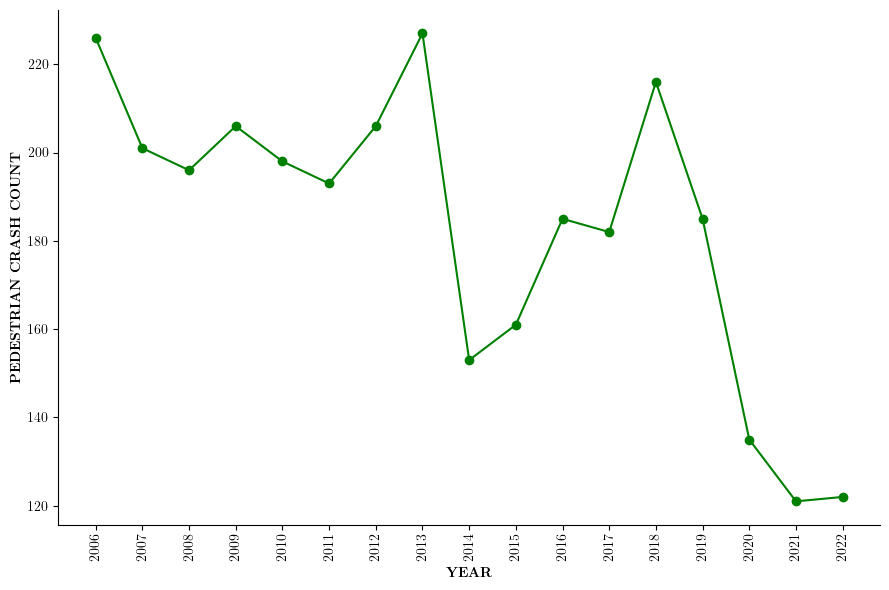

In [32]:
# Create a line plot to summarize the data from last cell
plt.figure(figsize=(9,6))
plt.plot(yearly_crash.index, yearly_crash.values, marker="o", color='green')
plt.xticks(yearly_crash.index, rotation=90)
plt.xlabel(r'\textbf{YEAR}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save the figure
# plt.savefig('1 - Annual Pedestrian Crash.png', dpi=600)

Now let's see what the other temporal measures shows when it comes to the number of pedestrian crash

#### Pedestrian Crash per MONTH

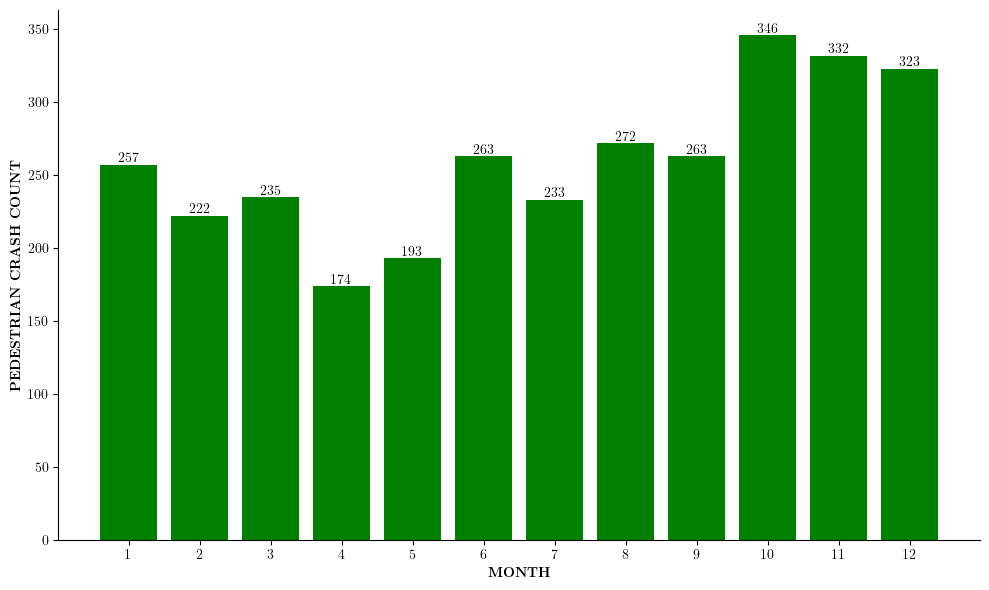

In [34]:
# Groupby Month
monthly = df.groupby('MONTH').size()
# Create a barplot
plt.figure(figsize=(10,6))
bars = plt.bar(monthly.index, monthly.values, color="green")
plt.xticks(monthly.index)
plt.xlabel(r'\textbf{MONTH}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom')
# Save the figure
# plt.savefig('2 - Monthly Pedestrian Crash.png', dpi=600)

#### Pedestrian Crash per DAY of the MONTH

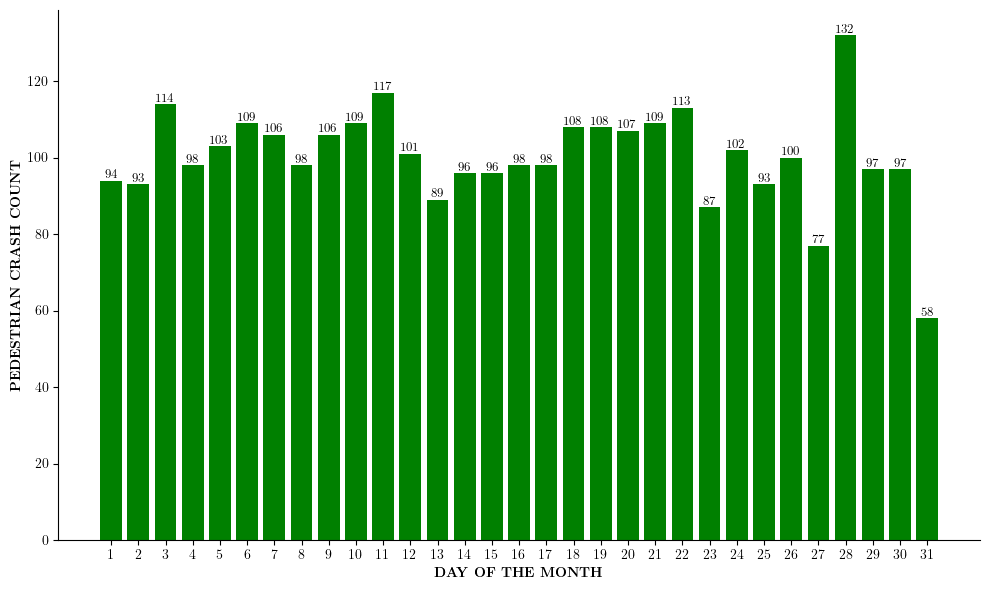

In [36]:
# Groupby Day
daily = df.groupby('DAY').size()
# Create a barplot
plt.figure(figsize=(10,6))
bars = plt.bar(daily.index, daily.values, color="green")
plt.xticks(daily.index)
plt.xlabel(r'\textbf{DAY OF THE MONTH}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=9)
# Save the figure
# plt.savefig('3 - Day of the Month Pedestrian Crash.png', dpi=600)

#### Pedestrian Crash per HOUR of the DAY

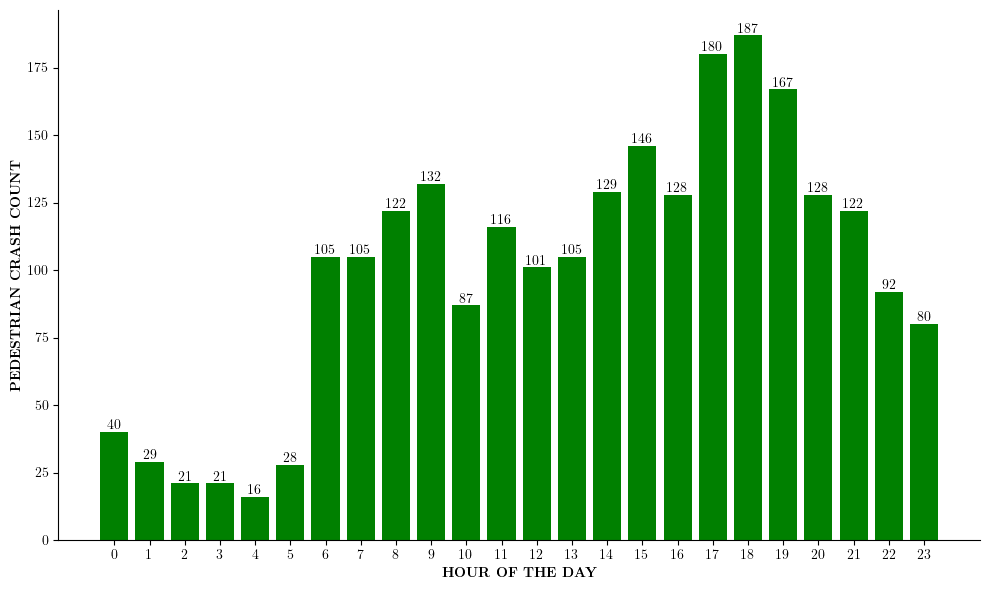

In [38]:
weekday_df = df[df['DAYOFWEEK']=='weekday']
hourly_weekday = weekday_df.groupby('HOUR').size()
# Create the plot
plt.figure(figsize=(10,6))
bars = plt.bar(hourly_weekday.index, hourly_weekday.values, color="green")
plt.xticks(hourly_weekday.index)
plt.xlabel(r'\textbf{HOUR OF THE DAY}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
# Save the plot
# plt.savefig('4 - Hour of Day Crash - Weekday.png', dpi=600)

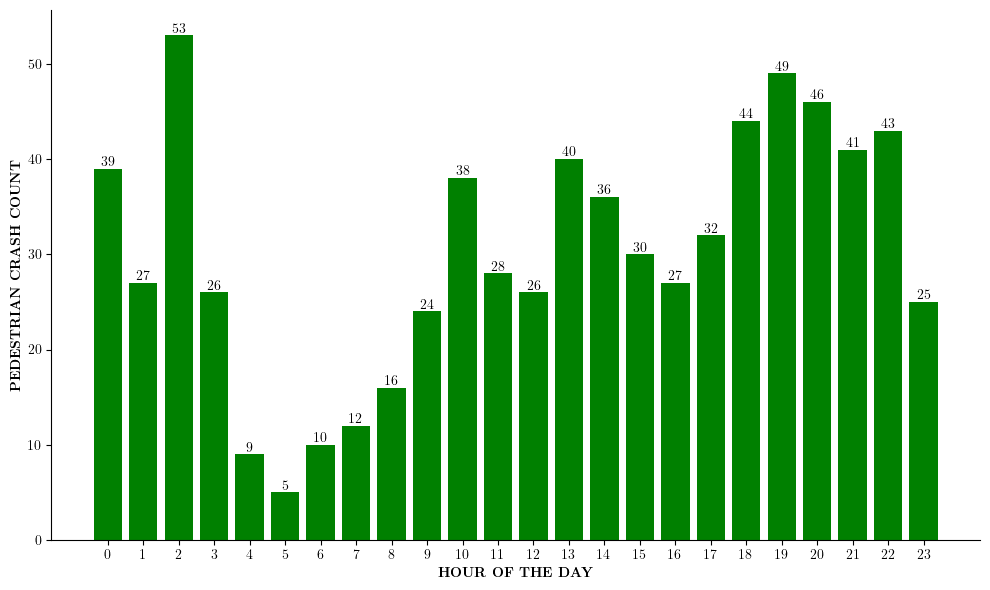

In [40]:
weekend_df = df[df['DAYOFWEEK']=='weekend']
hourly_weekend = weekend_df.groupby('HOUR').size()
# Create the plot
plt.figure(figsize=(10,6))
bars = plt.bar(hourly_weekend.index, hourly_weekend.values, color="green")
plt.xticks(hourly_weekend.index)
plt.xlabel(r'\textbf{HOUR OF THE DAY}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
# Save the plot
# plt.savefig('5 - Hour of Day Crash - Weekend.png', dpi=600)

Some patterns/insights drawn from these visuals:
- Fluctuations in pedestrian crash from 2006 to 2022. Spikes on years 2006, 2013, and 2018. **Investigate any policy or infrastructure changes or past roadway infrastructure (or lack of) that might've contributed to the spike.**
- Top 3 months with high pedestrian crash are October (10), November (11) and December (12). This can be attributed to the fact that these periods are somehow close to the holidays so that generates more road traffic specially in urban areas.
- Day 28 of a month seems to have the most crash
- For weekdays, the hour where most pedestrian crash occured was during the **PM Peak period (6 pm)** and for weekend, the hour where most pedestrian crash occured was during **AM Non-Peak period (2 am)**.

### 3.3.2. Environmental (E)

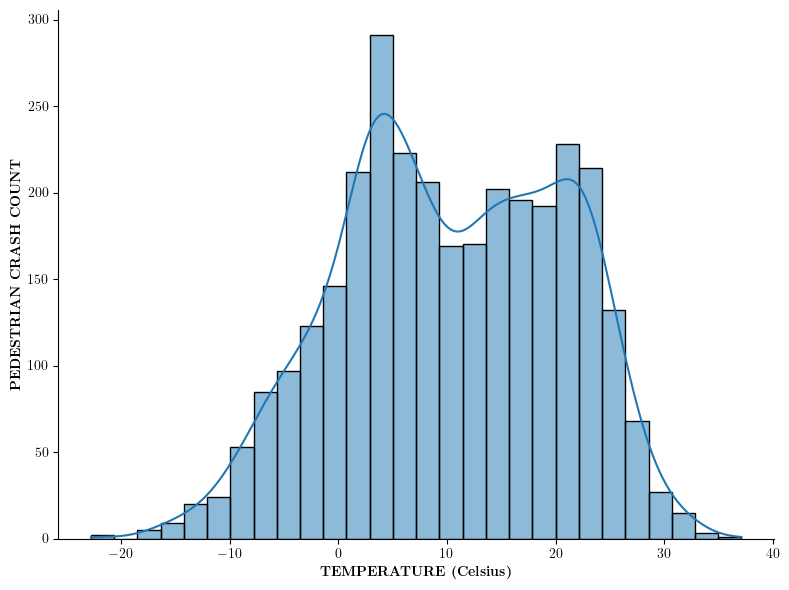

In [43]:
# Histogram for Temperature
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='TEMP', kde=True)
plt.xlabel(r'\textbf{TEMPERATURE (Celsius)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save figure
# plt.savefig('6 - Temperature Histogram.png', dpi=600)

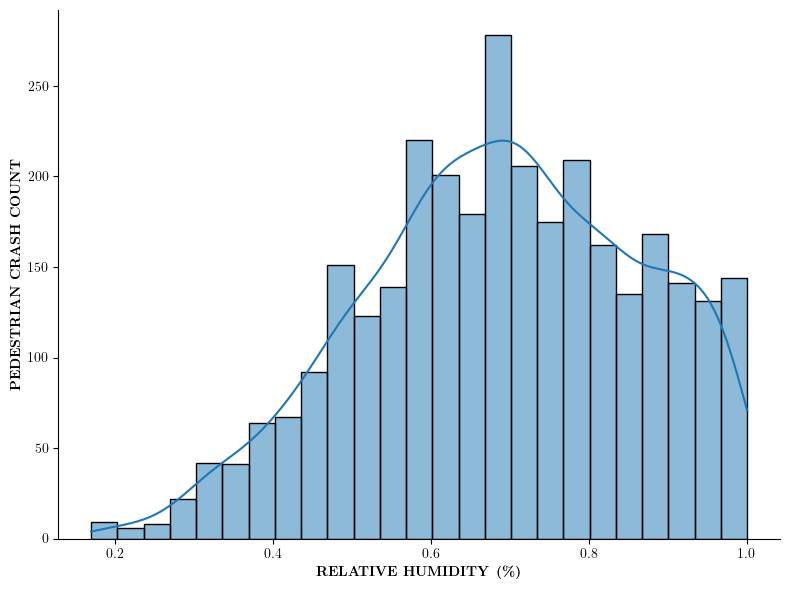

In [45]:
# Histogram for Relative Humidity
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='REL_HUMID', kde=True)
plt.xlabel(r'\textbf{RELATIVE HUMIDITY (\%)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save figure
# plt.savefig('7 - Relative Humidity Histogram.png', dpi=600)

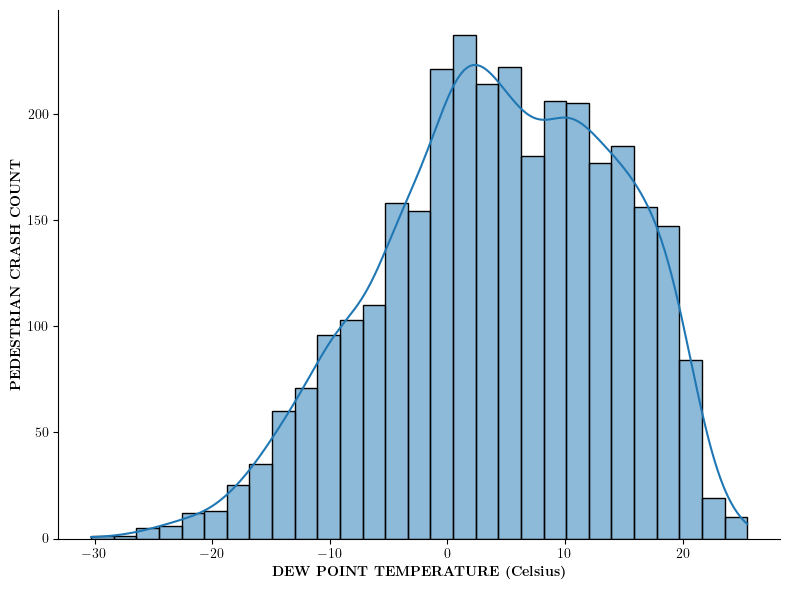

In [47]:
# Histogram for Dew Point Temperature
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='DEW_POINT', kde=True)
plt.xlabel(r'\textbf{DEW POINT TEMPERATURE (Celsius)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save figure
# plt.savefig('8 - Dew Point Temperature Histogram.png', dpi=600)

The rest of the observation for the Environmental group are summarized in the table to be included in the Assignment. 

### 3.3.3. Traffic and Road Characteristics

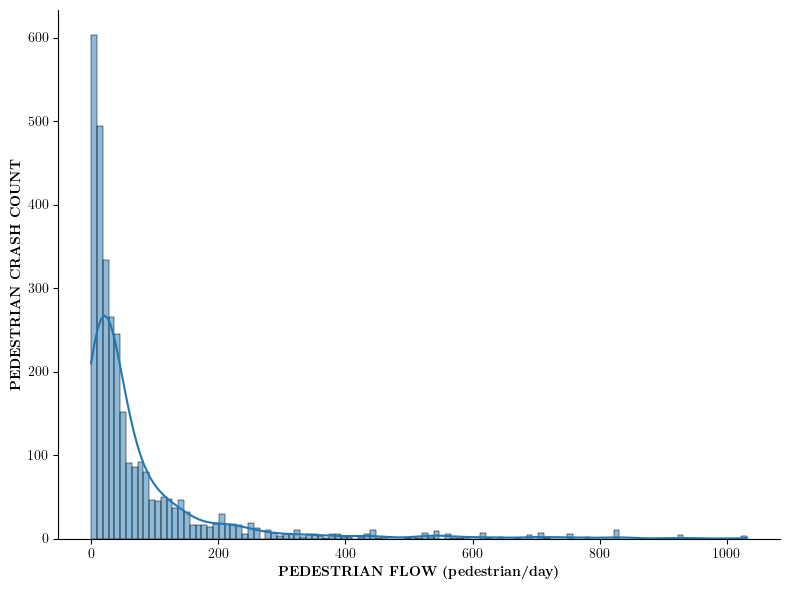

In [49]:
# Histogram of Pedestrian Flow
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='PED_ADT', kde=True)
plt.xlabel(r'\textbf{PEDESTRIAN FLOW (pedestrian/day)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save plot
# plt.savefig('9 - Pedestrian Flow Histogram.png', dpi=600)

#### Pedestrian Crash Location and Injury

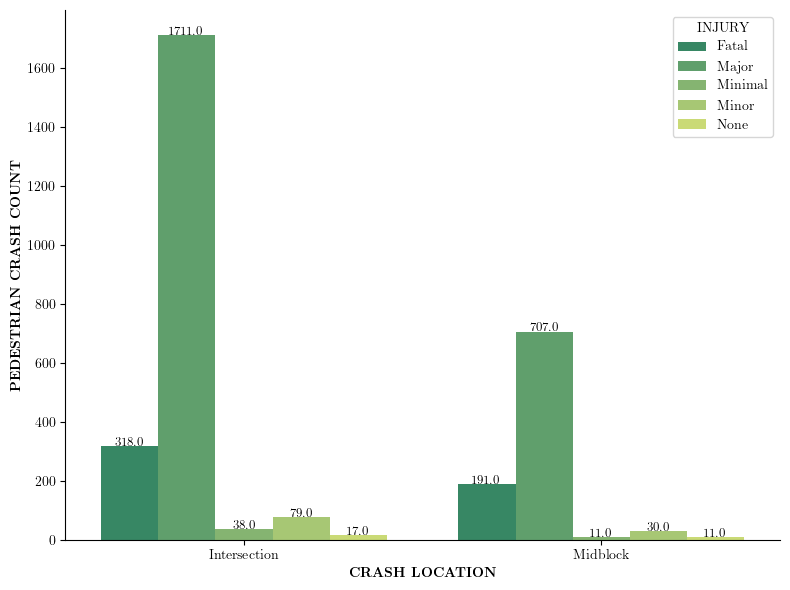

In [51]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='LOCCOORD', hue='INJURY', dodge=True, palette='summer')
plt.xlabel(r'\textbf{CRASH LOCATION}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, height, ha="center", fontsize=9)
# Save plot
# plt.savefig("10 - Pedestrian Crash Location and Injury.png", dpi=600)

#### Proportion of Pedestrian Crash given Traffic Controls

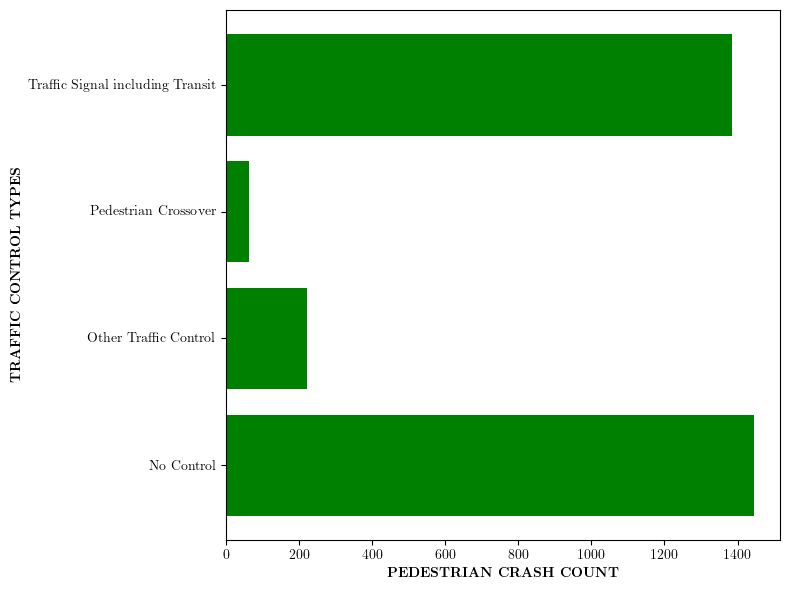

In [54]:
plt.figure(figsize=(8,6))
traffic_controls = df.groupby('TRAFFCTL').size()
plt.barh(traffic_controls.index, traffic_controls.values, color='green')
plt.xlabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.ylabel(r'\textbf{TRAFFIC CONTROL TYPES}')
plt.tight_layout()
# Save plot
# plt.savefig('11 - Pedestrian Crash per Traffic Control Type.png', dpi=600)

#### Proportion of Pedestrian Crash on Different Road Class

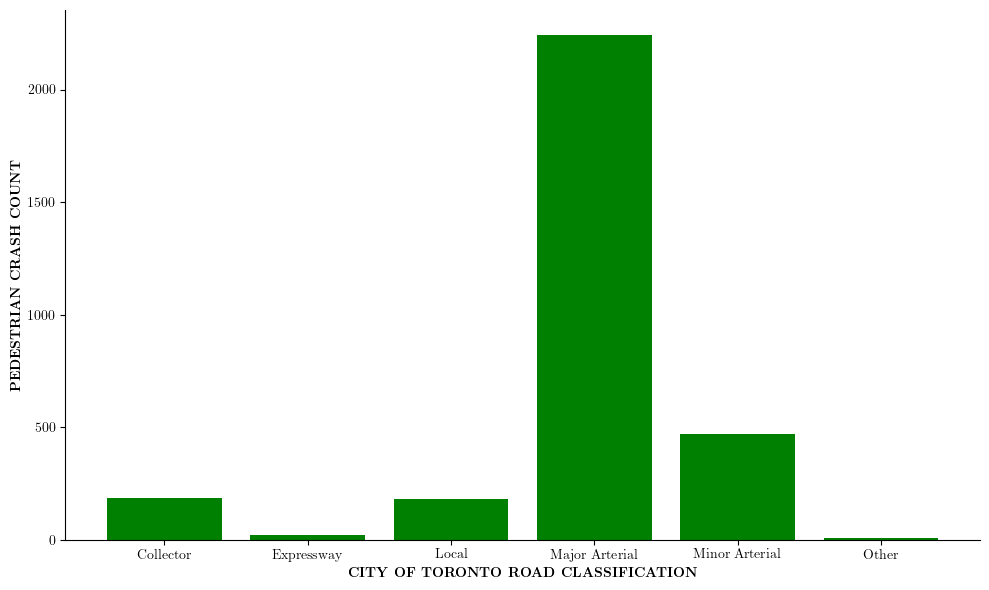

In [56]:
plt.figure(figsize=(10,6))
roadclass = df.groupby('ROADCLASS').size()
plt.bar(roadclass.index, roadclass.values, color='green')
plt.xlabel(r'\textbf{CITY OF TORONTO ROAD CLASSIFICATION}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save plot
# plt.savefig('12 - Road Classification and Number of Crashes.png', dpi=600)

### 3.3.4. Built Environment

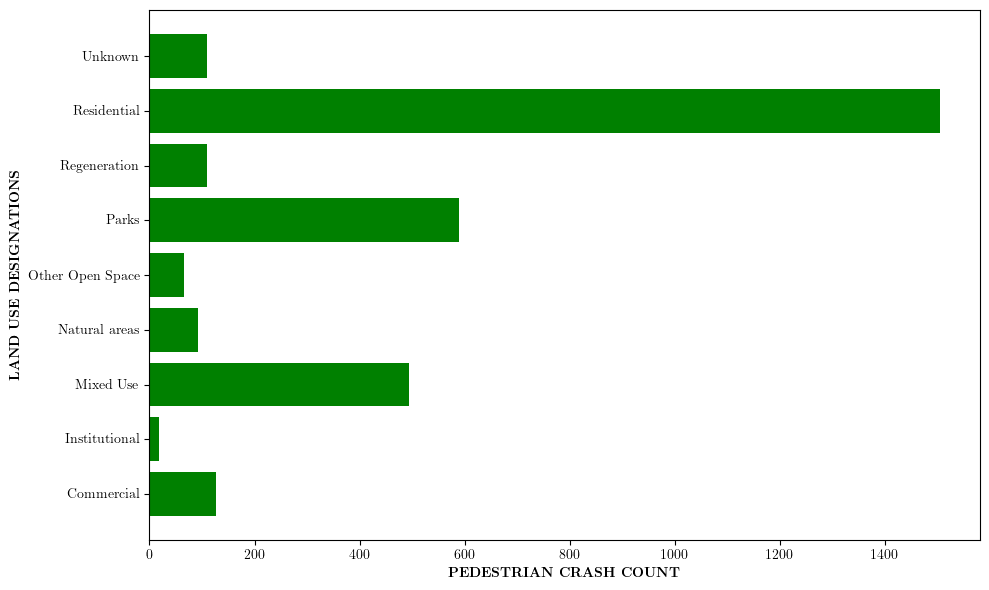

In [59]:
lu = df.groupby('LAND_USE').size()
plt.figure(figsize=(10,6))
plt.barh(lu.index, lu.values, color='green')
plt.xlabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.ylabel(r'\textbf{LAND USE DESIGNATIONS}')
plt.tight_layout()
# Save plot
# plt.savefig('13 - Land Use and Pedestrian Crash.png', dpi=600)

### 3.3.5. Demographics

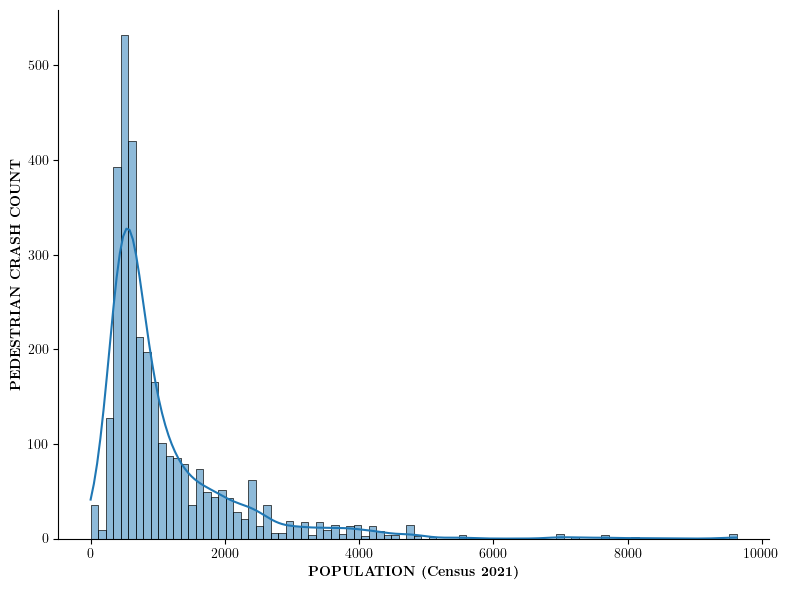

In [61]:
# Population Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='POP_2021', kde=True)
plt.xlabel(r'\textbf{POPULATION (Census 2021)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save plot
# plt.savefig('14 - Population Histogram.png', dpi=600)

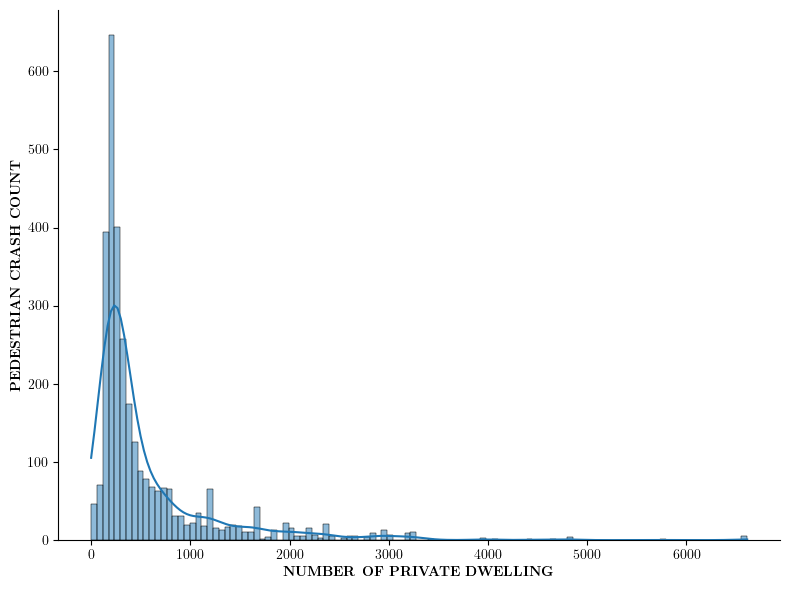

In [63]:
# Number of Private Dwellings Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='PRIV_DWELL', kde=True)
plt.xlabel(r'\textbf{NUMBER OF PRIVATE DWELLING}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save plot
# plt.savefig('15 - Number of Private Dwelling Histogram.png', dpi=600)

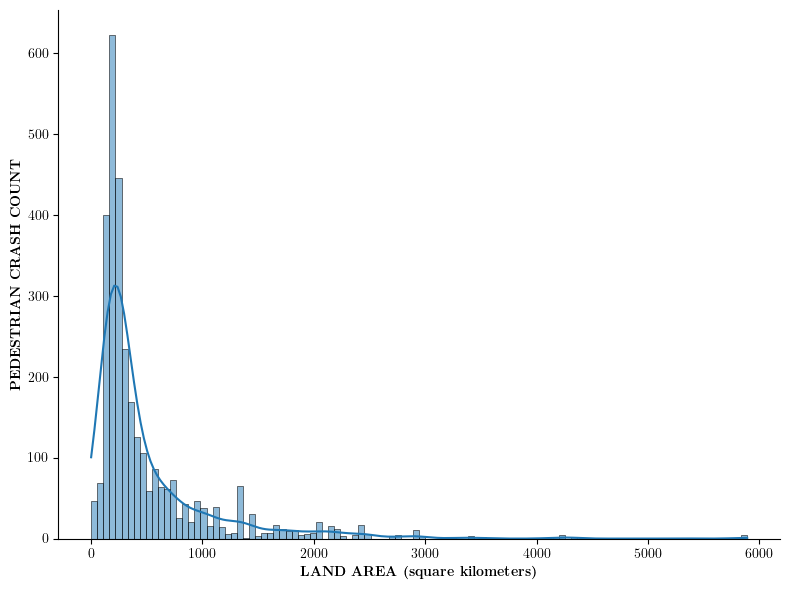

In [65]:
# Land Area Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='LAND_AREA', kde=True)
plt.xlabel(r'\textbf{LAND AREA (square kilometers)}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# Save plot
# plt.savefig('16 - Land Area Histogram.png', dpi=600)

### 3.3.6. Pedestrian Characteristics

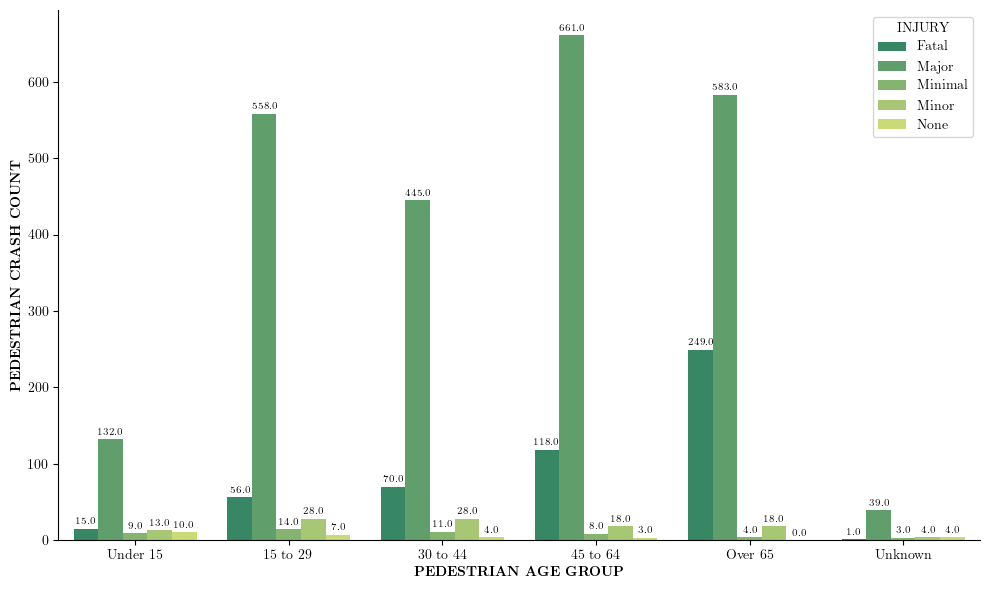

In [67]:
# Plot the pedestrian age and injury severity
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='INVAGE', hue='INJURY',
                  order=['Under 15', '15 to 29', '30 to 44', '45 to 64', 'Over 65', 'Unknown'],
                  palette='summer', dodge=True)
# Extra annotations
plt.xlabel(r'\textbf{PEDESTRIAN AGE GROUP}')
plt.ylabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
# Save figure
# plt.savefig('17 - Pedestrian Age and Injury Distribution.png', dpi=600)

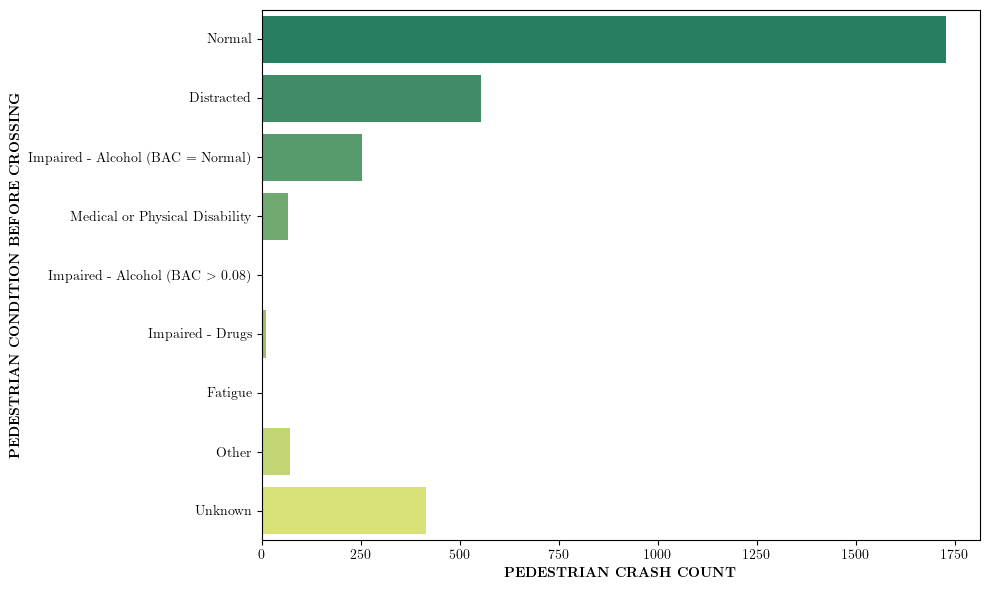

In [74]:
# Plot the pedestrian condition and injury severity
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='PEDCOND',
             order=['Normal', 'Distracted', 'Impaired - Alcohol (BAC = Normal)', 'Medical or Physical Disability',
                   'Impaired - Alcohol (BAC $>$ 0.08)', 'Impaired - Drugs', 'Fatigue', 'Other', 'Unknown'], palette="summer")
# Extra annotations
plt.xlabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.ylabel(r'\textbf{PEDESTRIAN CONDITION BEFORE CROSSING}')
plt.tight_layout()
# Save figure
# plt.savefig('18 - Pedestrian Condition and Crash.png', dpi=600)

### 3.3.7. Crash Information

**MANOEUVER** attribute will be removed since most of the unique values of this attributes are unknown. Will discuss this on the formal term paper.

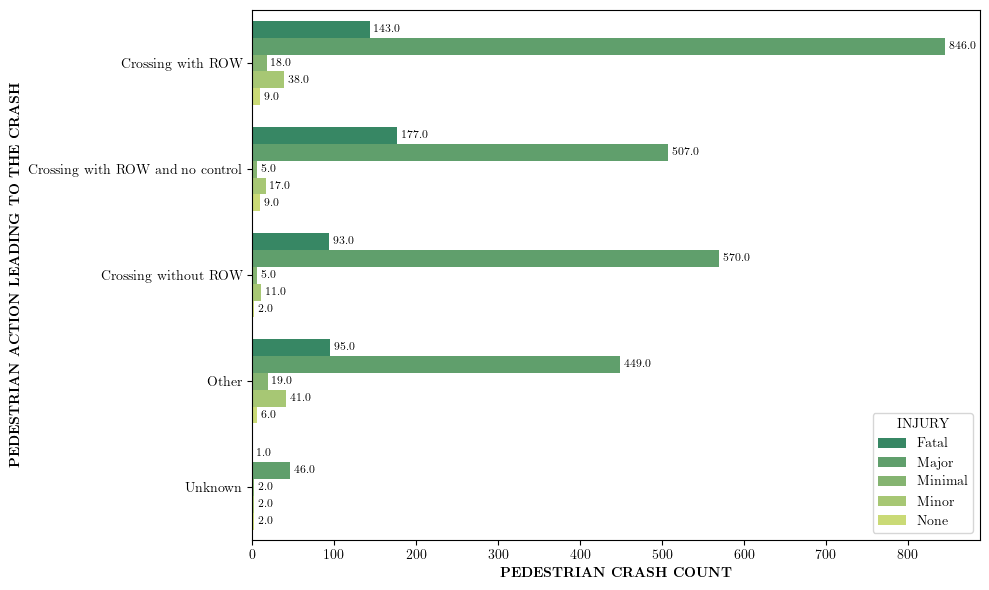

In [76]:
# Plot the pedestrian action and injury severity
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='PEDACT', hue='INJURY',
                  palette='summer', dodge=True)
plt.xlabel(r'\textbf{PEDESTRIAN CRASH COUNT}')
plt.ylabel(r'\textbf{PEDESTRIAN ACTION LEADING TO THE CRASH}')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width}', (width + 5, y + height/2), ha='left', va='center', fontsize=8)
plt.tight_layout()
# Save figure
# plt.savefig('19 - Pedestrian Action and Injury.png', dpi=600)

### 3.3.8. Miscellaneous Plot(s)

In [77]:
df1 = gpd.read_file(r"E:\Term Project 619.26\2_FINAL DATA FOR ML\processed_data_final.shp")
df1 = df1.drop(['DAUID', 'LATITUDE', 'LONGITUDE', 'geometry'], axis=1)
df1.head(2)

,INDEX_,DATETIME,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,DEW_POINT,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,PED_ADT,LAND_USE,POP_2021,PRIV_DWELL,LAND_AREA,POP_DENS,PDENS_AREA,INVAGE,PEDCOND,MANOEUVER,PEDACT,VEHINV,VIOL,INJURY
0,3366652,2006-01-02 07:05:00,2006,1,2,7,weekday,Other,Dark,Wet,1.5,0.99,1.3,Midblock,No Control,Major Arterial,50,219.0,Mixed Use,504,263,225,0.08,6537.0,45 to 64,Distracted,Unknown,Crossing without ROW,automobile,speeding,Major
1,3370334,2006-01-04 19:40:00,2006,1,4,19,weekday,Rain,Dark,Wet,4.8,1.00,4.8,Midblock,Traffic Signal including Transit,Major Arterial,50,63.0,Residential,452,205,183,0.15,3005.3,Over 65,Normal,Unknown,Crossing without ROW,automobile,speeding,Major


In [79]:
df1['DATETIME'] = pd.to_datetime(df1['DATETIME'])

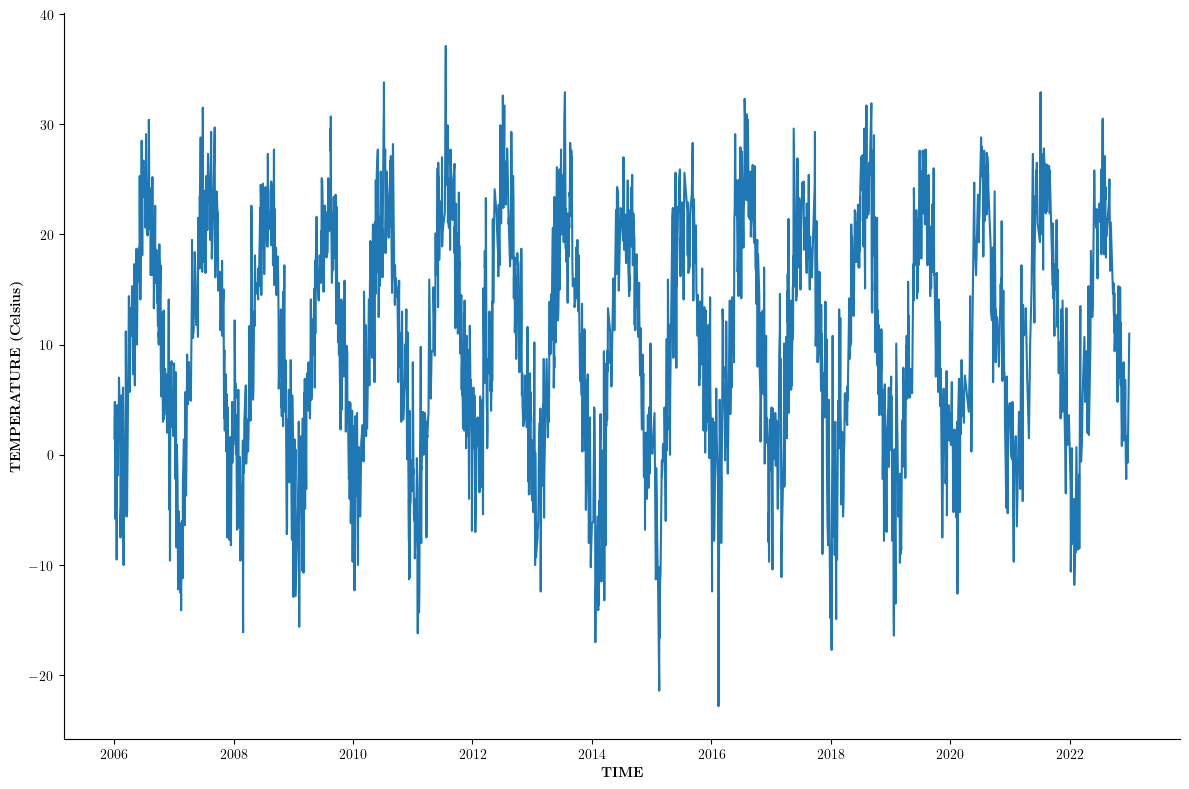

In [98]:
# Temperature Plot through time
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x='DATETIME', y='TEMP', errorbar='ci')
plt.xlabel(r'\textbf{TIME}')
plt.ylabel(r'\textbf{TEMPERATURE (Celsius)}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# plt.savefig('20 - Temperature through Years.png', dpi=600)

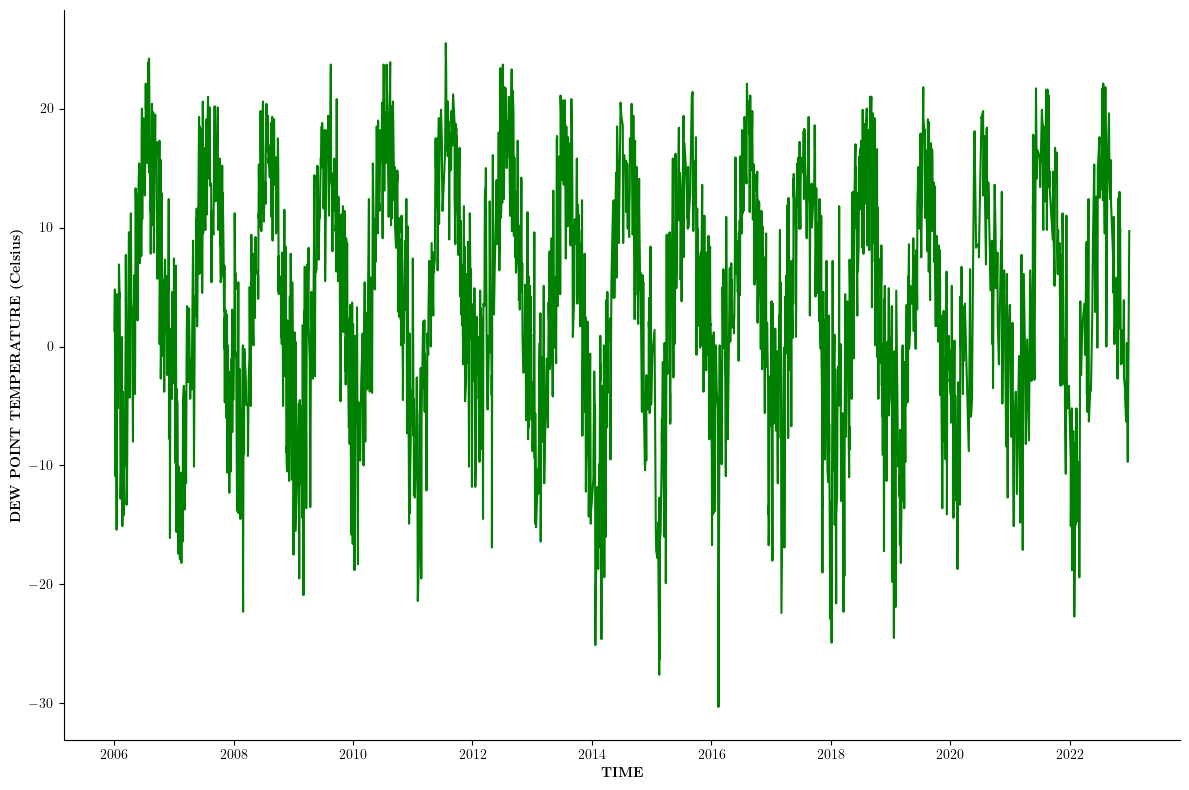

In [101]:
# Temperature Plot through time
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x='DATETIME', y='DEW_POINT', errorbar='ci', color='green')
plt.xlabel(r'\textbf{TIME}')
plt.ylabel(r'\textbf{DEW POINT TEMPERATURE (Celsius)}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# plt.savefig('21 - Dew Point Temperature through Years.png', dpi=600)

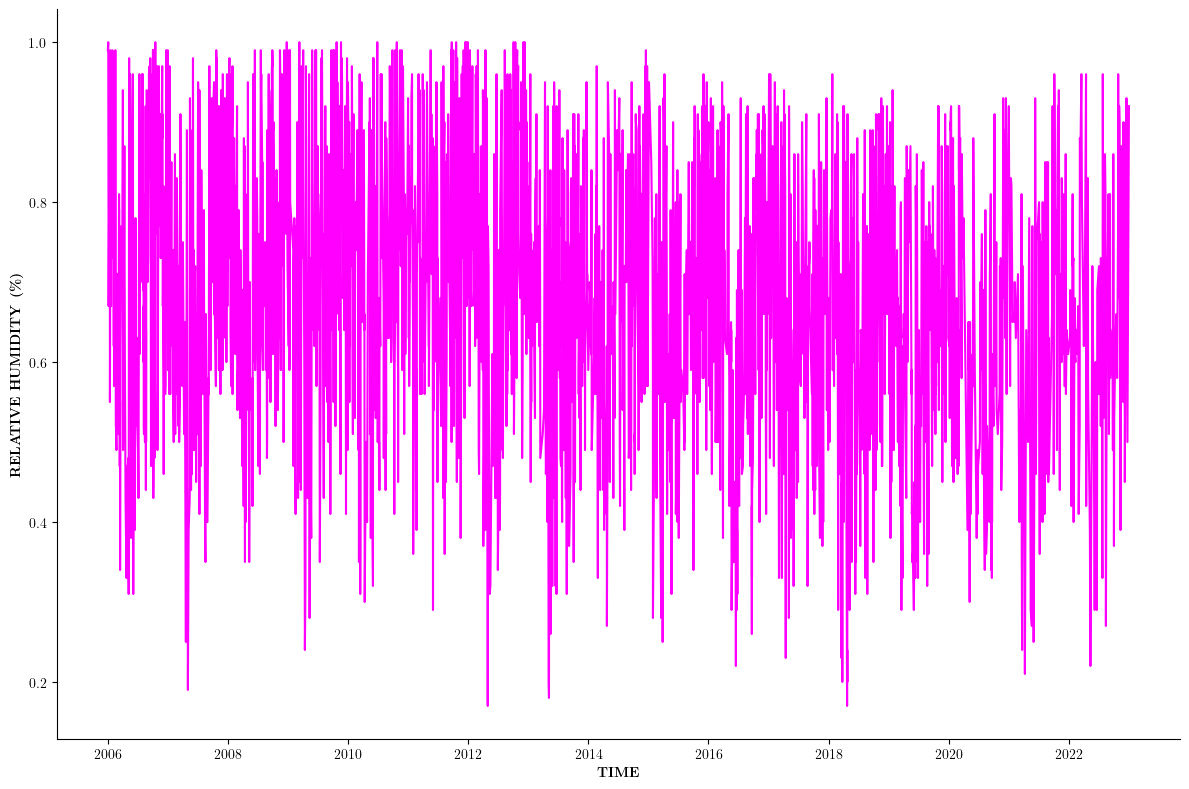

In [103]:
# Temperature Plot through time
plt.figure(figsize=(12,8))
sns.lineplot(data=df1, x='DATETIME', y='REL_HUMID', errorbar='ci', color='magenta')
plt.xlabel(r'\textbf{TIME}')
plt.ylabel(r'\textbf{RELATIVE HUMIDITY (\%)}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# plt.savefig('22 - Relative Humidity through Years.png', dpi=600)